In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle  
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import *
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [3]:
df = pd.read_csv("./1115-TRAIN-CANCER-NORMAL.csv",sep=';',index_col=0,decimal=",").round(3)
df = shuffle(df) 
df.head(5)

,ENSG00000117791,ENSG00000173838,ENSG00000184702,ENSG00000140623,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000118017,ENSG00000205002,...,ENSG00000166634,ENSG00000203870,ENSG00000188176,ENSG00000157703,ENSG00000107807,ENSG00000087128,ENSG00000164761,ENSG00000134588,ENSG00000243660,merged.numeric
TCGA-2G-AAGN-01,-0.013,0.423,3.977,2.806,2.365,-9.966,6.298,2.789,-5.574,-0.394,...,-5.012,-9.966,1.138,0.380,-0.808,3.339,-0.472,-9.966,0.688,56
GTEX-144FL-0326-SM-5O99O,3.883,-9.966,3.065,-9.966,2.546,-6.506,6.891,-1.732,-4.608,-6.506,...,-5.012,-9.966,7.709,-9.966,-4.608,-9.966,-1.026,-9.966,1.071,36
TCGA-BR-8284-01,3.188,-3.626,2.218,-9.966,1.907,-2.114,8.022,-1.884,4.974,-1.117,...,-9.966,-9.966,-3.308,-3.816,1.783,-9.966,1.527,-6.506,1.293,53
TCGA-GJ-A9DB-01,6.096,-6.506,3.728,-5.012,9.758,5.008,9.313,-9.966,-5.574,-9.966,...,-9.966,-9.966,-5.012,-4.035,1.820,-9.966,1.670,-5.012,0.979,30
GTEX-131XE-2026-SM-5LZW1,5.204,-2.932,4.727,-9.966,3.512,-9.966,8.991,-2.178,-5.012,-3.171,...,-3.458,-9.966,1.774,-2.548,-1.318,-3.626,2.566,-9.966,1.328,2


In [4]:
df1=df[df['merged.numeric']<6]

In [5]:
#x = (1/(1+np.exp(-df.iloc[:,:-1]))).values
x=  df1.iloc[:,:-1].values
y = df1['merged.numeric'].values


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = np_utils.to_categorical(y_train, 65)
y_test = np_utils.to_categorical(y_test, 65)
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (1094, 3778)
Testing matrix shape (58, 3778)


In [7]:
#K.clear_session()

In [14]:
input_data = Input(shape=(3778,))
layer1=Dense(1000, activation='sigmoid')
# encoder layers
encoded = layer1(input_data)
encoded = Dense(300, activation='relu')(encoded)
encoded = Dense(20, activation='relu')(encoded)
encoder_output = Dense(2, activation='sigmoid')(encoded)

# decoder layers
decoded = Dense(2, activation='sigmoid')(encoder_output)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(300, activation='relu')(decoded)
decoded = Dense(1000, activation='sigmoid')(decoded)
decoded = Dense(3778)(decoded)

# construct the autoencoder model
autoencoder = Model(inputs=input_data, outputs=decoded)


#encoder = Model(inputs=input_data, outputs=encoder_output)

autoencoder.compile(loss='mse',
              optimizer=Adadelta())


In [15]:
autoencoder.fit(x_train, x_train,
          epochs=100,
          batch_size=1000)

Epoch 1/100
1094/1094 [==============================] - 1s 560us/step - loss: 37.8752
Epoch 2/100
1094/1094 [==============================] - 0s 42us/step - loss: 34.1791
Epoch 3/100
1094/1094 [==============================] - 0s 43us/step - loss: 30.8654
Epoch 4/100
1094/1094 [==============================] - 0s 42us/step - loss: 27.9373
Epoch 5/100
1094/1094 [==============================] - 0s 42us/step - loss: 25.3454
Epoch 6/100
1094/1094 [==============================] - 0s 42us/step - loss: 23.0488
Epoch 7/100
1094/1094 [==============================] - 0s 41us/step - loss: 20.9671
Epoch 8/100
1094/1094 [==============================] - 0s 41us/step - loss: 19.0733
Epoch 9/100
1094/1094 [==============================] - 0s 40us/step - loss: 17.2945
Epoch 10/100
1094/1094 [==============================] - 0s 40us/step - loss: 15.5818
Epoch 11/100
1094/1094 [==============================] - 0s 41us/step - loss: 13.8737
Epoch 12/100
1094/1094 [===========================

1094/1094 [==============================] - 0s 41us/step - loss: 7.5589
Epoch 96/100
1094/1094 [==============================] - 0s 42us/step - loss: 7.5603
Epoch 97/100
1094/1094 [==============================] - 0s 41us/step - loss: 7.5630
Epoch 98/100
1094/1094 [==============================] - 0s 42us/step - loss: 7.5627
Epoch 99/100
1094/1094 [==============================] - 0s 41us/step - loss: 7.5614
Epoch 100/100
1094/1094 [==============================] - 0s 40us/step - loss: 7.5574


In [56]:
encoder = Model(inputs=input_data, outputs=encoder_output)
x_pre=encoder.predict(x_train)

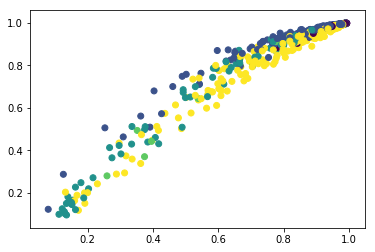

In [80]:
plt.scatter(x_pre[:,0],x_pre[:,1],c=to_classes(y_train))

In [24]:
K.clear_session()

In [17]:
x_pre=model.predict(x_test)

In [18]:
x_test

array([[  9.80866611e-01,   3.05311754e-02,   7.10126817e-01, ...,
          2.52372265e-01,   6.61354465e-03,   9.37321067e-01],
       [  9.64531600e-01,   2.58074611e-01,   9.72266793e-01, ...,
          6.91683173e-01,   1.49221555e-03,   9.18937683e-01],
       [  8.32018375e-01,   8.00592244e-01,   9.21651483e-01, ...,
          8.58635128e-01,   4.69678635e-05,   8.57049823e-01],
       ..., 
       [  9.97470021e-01,   4.11685973e-01,   9.93313789e-01, ...,
          9.08794165e-01,   4.69678635e-05,   8.84218574e-01],
       [  9.70716238e-01,   6.61354465e-03,   7.14838326e-01, ...,
          9.92217004e-01,   3.05311754e-02,   7.31255174e-01],
       [  9.91607606e-01,   1.25867739e-01,   9.78374064e-01, ...,
          5.05941696e-02,   4.69678635e-05,   8.98712456e-01]], dtype=float32)

In [57]:
mse=((x_test-x_pre)**2).mean(axis=1)

In [19]:
x_pre

array([[  9.35333788e-01,   3.60254161e-02,   7.14893997e-01, ...,
          7.89283216e-01,   2.51407968e-03,   9.07239377e-01],
       [  9.49077606e-01,   3.27576101e-01,   9.24969137e-01, ...,
          7.45792925e-01,   1.10484213e-02,   8.61416459e-01],
       [  8.41010451e-01,   5.55914164e-01,   8.57202470e-01, ...,
          7.26058424e-01,  -4.35067341e-04,   8.85647476e-01],
       ..., 
       [  9.76839840e-01,   5.00220656e-01,   9.70766544e-01, ...,
          8.40421140e-01,  -1.24486666e-02,   8.58327210e-01],
       [  9.38353896e-01,  -5.00581786e-03,   6.72043800e-01, ...,
          7.73094475e-01,   1.41654741e-02,   7.54794061e-01],
       [  9.84893560e-01,   2.78782755e-01,   9.82645631e-01, ...,
          1.12676546e-01,   1.71208568e-03,   8.87922823e-01]], dtype=float32)

In [36]:
dfx=(2**df.iloc[:,:-1]-0.001).round(4)


In [37]:
dfx

,ENSG00000117791,ENSG00000173838,ENSG00000184702,ENSG00000140623,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000118017,ENSG00000205002,...,ENSG00000277535,ENSG00000166634,ENSG00000203870,ENSG00000188176,ENSG00000157703,ENSG00000107807,ENSG00000087128,ENSG00000164761,ENSG00000134588,ENSG00000243660
TCGA-K4-A54R-11,6.0998,0.0700,4.0101,0.3000,2.4308,-0.0000,381.0922,1.3003,0.0400,0.1700,...,-0.0000,-0.0000,-0.0000,0.6698,0.2900,-0.0000,25.7758,0.5500,-0.0000,6.1210
TCGA-BF-AAP6-01,9.8823,0.2000,48.5019,-0.0000,72.0027,-0.0000,268.5403,0.0100,0.0100,3.0898,...,-0.0000,-0.0000,-0.0000,0.2400,-0.0000,0.0200,0.0500,0.7402,0.0100,1.2700
TCGA-AC-A3W5-01,13.7933,0.1200,56.0240,0.4499,37.9746,0.0300,197.8129,0.6501,-0.0000,3.6392,...,-0.0000,-0.0000,-0.0000,0.1700,2.1204,0.0300,0.0900,2.1800,0.0100,3.0600
GTEX-147F3-0726-SM-5NQ9U,40.7002,1.0903,11.8013,0.1300,20.1950,0.0600,1870.2290,0.0900,0.0500,4.6903,...,-0.0000,-0.0000,-0.0000,6.6014,0.1100,-0.0000,-0.0000,8.5081,-0.0000,4.8693
GTEX-XQ3S-0426-SM-4BOOA,9.6321,-0.0000,2.6307,-0.0000,2.3204,-0.0000,24.1331,0.0800,-0.0000,0.1000,...,-0.0000,-0.0000,-0.0000,177.0474,-0.0000,-0.0000,0.0200,0.4800,-0.0000,0.9103
GTEX-132QS-0426-SM-5KLZ6,15.0627,-0.0000,61.9047,0.1400,1.7595,-0.0000,155.2006,0.0300,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,11.9993,-0.0000,0.1800,0.0100,8.9995,-0.0000,1.5295
TCGA-CN-4742-01,1.5901,0.0100,49.3497,-0.0000,5.6913,-0.0000,51.9111,89.6346,-0.0000,0.0300,...,-0.0000,0.8001,-0.0000,0.4301,0.0700,-0.0000,1.7305,2.3398,-0.0000,2.3807
TCGA-AB-3008-03,0.4301,0.0700,48.4347,0.0300,11.0569,-0.0000,11.5504,0.2699,0.0300,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,4.8491,-0.0000,-0.0000,0.2100,-0.0000,4.9304
GTEX-13OW6-1526-SM-5L3HX,26.5556,0.1000,53.0019,-0.0000,15.7241,0.0700,654.3859,0.0500,0.0600,0.3300,...,-0.0000,-0.0000,-0.0000,0.0600,-0.0000,-0.0000,-0.0000,99.2493,-0.0000,4.2713
TCGA-AC-A6IX-06,27.6642,0.1000,42.9316,0.9003,21.3762,0.0100,103.0347,3.1504,0.0300,16.8879,...,-0.0000,-0.0000,-0.0000,0.3300,1.5802,0.0300,21.3318,1.5703,0.0200,3.8601


In [71]:
n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

In [76]:
max(T)

3.1408691409824372

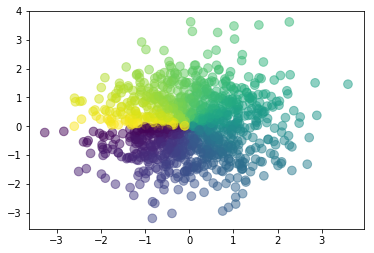

In [73]:
plt.scatter(X, Y, s=75, c=T, alpha=.5)

In [77]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [23]:
#def to_classes(categ):return np.array(list(map(lambda x:np.argmax(x),categ)))

In [22]:
to_classes(y_train)

array([2, 2, 5, ..., 2, 5, 5])

In [35]:
sum(layer1.get_weights()[0][2])

1.4161365704549098

In [21]:
to_classes=lambda c:np.array(list(map(lambda x:np.argmax(x),c)))